# House value Prediction

This Notebook was built to select the best model for predicting the house value in California using California housing data with features like close to the beach or not, total rooms and more

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can see that only the column total_bedrooms have missing data

#### Missing Data

We are going to use the knn imputer to deal with it

In [7]:
housing1 = housing.drop('ocean_proximity', axis=1)

In [8]:
from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)
housing2 = pd.DataFrame(imp.fit_transform(housing1), columns=housing1.columns)

In [9]:
housing2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

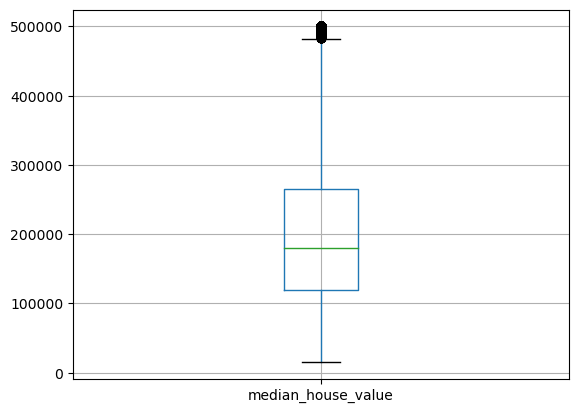

In [11]:
housing.boxplot("median_house_value")
plt.show()

In [12]:
housing2['near_ocean'] = np.where(housing['ocean_proximity'] == 'NEAR OCEAN', 1, 0)

In [13]:
housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


In [14]:
n_min = housing2[housing2['near_ocean'] == 1]
len(n_min)

2658

In [15]:
housing2['near_ocean'].value_counts()

near_ocean
0    17982
1     2658
Name: count, dtype: int64

The data is highly unbalanced towards houses that are not near the ocean, so we will downsize it

In [16]:
n_min = sum(housing2["near_ocean"] == 1)
n_maj = int(np.ceil((0.6 / 0.4) * n_min))

In [17]:
minority_housing = housing2.loc[housing2["near_ocean"] == 1]
majority_housing = housing2.loc[housing2["near_ocean"] == 0]
downsampled_majority = majority_housing.sample(n=n_maj, random_state=1)

In [18]:
balanced_housing = pd.concat([minority_housing, downsampled_majority])

In [19]:
balanced_housing['near_ocean'].value_counts()

near_ocean
0    3987
1    2658
Name: count, dtype: int64

In [20]:
balanced_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_ocean
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,1
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,1
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,1
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,1
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,1
...,...,...,...,...,...,...,...,...,...,...
1505,-122.03,37.93,21.0,4712.0,624.0,1773.0,615.0,6.0918,344800.0,0
5314,-118.42,34.06,40.0,2933.0,565.0,1077.0,536.0,6.1527,500001.0,0
19224,-122.70,38.45,39.0,2015.0,335.0,640.0,315.0,4.1734,240500.0,0
6731,-118.10,34.13,44.0,1917.0,265.0,754.0,257.0,12.4237,500001.0,0


In [21]:
housing = balanced_housing.drop('near_ocean', axis = 1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0
...,...,...,...,...,...,...,...,...,...
1505,-122.03,37.93,21.0,4712.0,624.0,1773.0,615.0,6.0918,344800.0
5314,-118.42,34.06,40.0,2933.0,565.0,1077.0,536.0,6.1527,500001.0
19224,-122.70,38.45,39.0,2015.0,335.0,640.0,315.0,4.1734,240500.0
6731,-118.10,34.13,44.0,1917.0,265.0,754.0,257.0,12.4237,500001.0


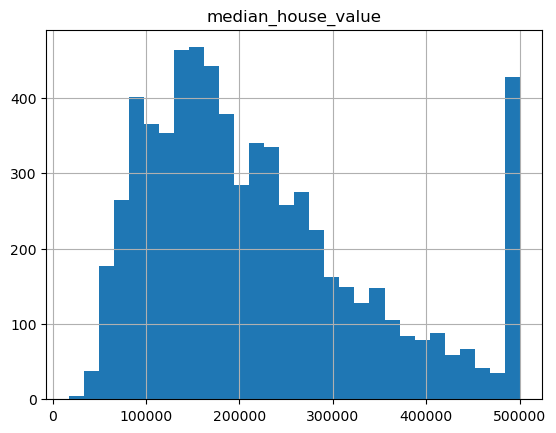

In [22]:
housing.hist("median_house_value", bins=30)
plt.show()

### Feature selection

we will use Sequentialfeatureselector for both front and back to select the best features

In [23]:
housing_ = housing.drop('median_house_value', axis=1)
housing1 = housing_.copy()

y = housing["median_house_value"]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(housing_)
housing_X = pd.DataFrame(scaled, columns = housing1.columns)

In [25]:
sfs_model = LinearRegression()
sfs_model2 = LinearRegression()
sfs_model3 = LinearRegression()

forward2 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=2, 
                                     direction="forward")

forward4 = SequentialFeatureSelector(estimator=sfs_model2,
                                     n_features_to_select=4, 
                                     direction="forward")

forward6 = SequentialFeatureSelector(estimator=sfs_model3,
                                       n_features_to_select=6, 
                                       direction="forward")

forward2.fit(housing_X, y)
forward4.fit(housing_X, y)
forward6.fit(housing_X, y)

print("Features selected in 2 feature model:", forward2.get_feature_names_out())
print("Features selected in 4 feature model:", forward4.get_feature_names_out())
print("Features selected in 6 feature model:", forward6.get_feature_names_out())

Features selected in 2 feature model: ['housing_median_age' 'median_income']
Features selected in 4 feature model: ['housing_median_age' 'total_bedrooms' 'population' 'median_income']
Features selected in 6 feature model: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']


In [26]:
backward2 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=2, 
                                     direction="backward")

backward4 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=4, 
                                     direction="backward")

backward6 = SequentialFeatureSelector(estimator=sfs_model,
                                       n_features_to_select=6, 
                                       direction="backward")

backward2.fit(housing_X, y)
backward4.fit(housing_X, y)
backward6.fit(housing_X, y)

print("Features selected in 2 feature model:", backward2.get_feature_names_out())
print("Features selected in 4 feature model:", backward4.get_feature_names_out())
print("Features selected in 6 feature model:", backward6.get_feature_names_out())

Features selected in 2 feature model: ['latitude' 'median_income']
Features selected in 4 feature model: ['longitude' 'latitude' 'population' 'median_income']
Features selected in 6 feature model: ['longitude' 'latitude' 'housing_median_age' 'total_bedrooms' 'population'
 'median_income']


Based on the features chosen by forward and backward selection, it seems like housing_median_age, median_income and latitude seem to be the most impactful on predicting median_house_value

In [27]:
fw2_model = LinearRegression() # .fit(housing_x[forward2.get_feature_names_out()], y)
fw4_model = LinearRegression() # .fit(housing_x[forward4.get_feature_names_out()], y)
fw6_model = LinearRegression() # .fit(housing_x[forward6.get_feature_names_out()], y)

bw2_model = LinearRegression() # .fit(housing_x[backward2.get_feature_names_out()], y)
bw4_model = LinearRegression() # .fit(housing_x[backward4.get_feature_names_out()], y)
bw6_model = LinearRegression() # .fit(housing_x[backward6.get_feature_names_out()], y)

## More Candidate Models

we are going to use Ridgecv and Lasso next

In [28]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(alphas = np.linspace(1, 10, num=1000))
lasso = LassoCV(alphas = np.linspace(0.01, 0.5, num=1000))

ridge.fit(housing_X, y)
lasso.fit(housing_X, y)

print("Ridge tuning parameter: ", ridge.alpha_)
print("LASSO tuning parameter: ", lasso.alpha_)

print("Ridge coefficients: ", ridge.coef_)
print("LASSO coefficients: ", lasso.coef_)

Ridge tuning parameter:  4.135135135135135
LASSO tuning parameter:  0.01
Ridge coefficients:  [-95547.77028452 -97563.40438908  16421.30641113  -7763.20594254
  52618.14857002 -49212.13569335   8657.03982856  78287.50454939]
LASSO coefficients:  [-96593.88150037 -98601.42808672  16361.34844007  -7975.04569528
  54033.91060396 -49258.89107936   7485.01496395  78316.11839502]


The LASSO tuning parameter always seems to be on the extreme. Given that the outcome has many small values, it suggests that having no features at all is better than having any. We'll try to home in on a better tuning parameter value below by choosing a smaller range to pick from.

## K-Fold Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor
reference = LinearRegression()
random = RandomForestRegressor()

reference_cv = cross_val_score(reference, housing_X[['housing_median_age', 'median_income']], y, cv = 5, scoring = "neg_mean_squared_error")
fw2_cv = cross_val_score(fw2_model, housing_X[forward2.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
fw4_cv = cross_val_score(fw4_model, housing_X[forward4.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
fw6_cv = cross_val_score(fw6_model, housing_X[forward6.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw2_cv = cross_val_score(bw2_model, housing_X[backward2.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw4_cv = cross_val_score(bw4_model, housing_X[backward4.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw6_cv = cross_val_score(bw6_model, housing_X[backward6.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
ridge_cv = cross_val_score(ridge, housing_X, y, cv = 5, scoring = "neg_mean_squared_error")
random_cv = cross_val_score(random, housing_X[['housing_median_age', 'total_bedrooms', 'population', 'median_income']], y, cv = 5, scoring = "neg_mean_squared_error")

In [30]:
print("Reference Model, Avg Test MSE: ", np.mean(reference_cv), " SD: ", np.std(reference_cv))
print("Forward-2 Model, Avg Test MSE: ", np.mean(fw2_cv), " SD: ", np.std(fw2_cv))
print("Forward-4 Model, Avg Test MSE: ", np.mean(fw4_cv), " SD: ", np.std(fw4_cv))
print("Forward-6 Model, Avg Test MSE: ", np.mean(fw6_cv), " SD: ", np.std(fw6_cv))
print("Backward-2 Model, Avg Test MSE: ", np.mean(bw2_cv), " SD: ", np.std(bw2_cv))
print("Backward-4 Model, Avg Test MSE: ", np.mean(bw4_cv), " SD: ", np.std(bw4_cv))
print("Backward-6 Model, Avg Test MSE: ", np.mean(bw6_cv), " SD: ", np.std(bw6_cv))
print("Ridge Model, Avg Test MSE: ", np.mean(ridge_cv), " SD: ", np.std(ridge_cv))
print("Random Forest Model, Avg Test MSE: ", np.mean(random_cv), " SD: ", np.std(random_cv))


Reference Model, Avg Test MSE:  -7470622289.860678  SD:  673498500.3859293
Forward-2 Model, Avg Test MSE:  -7470622289.860678  SD:  673498500.3859293
Forward-4 Model, Avg Test MSE:  -6782544083.801809  SD:  601542693.083698
Forward-6 Model, Avg Test MSE:  -6688393848.63101  SD:  722249219.1848178
Backward-2 Model, Avg Test MSE:  -8104206515.4711  SD:  913354491.623173
Backward-4 Model, Avg Test MSE:  -6297630976.195984  SD:  778318024.2037616
Backward-6 Model, Avg Test MSE:  -5504404982.96289  SD:  593431861.1572585
Ridge Model, Avg Test MSE:  -5510779353.982034  SD:  608501265.0379055
Random Forest Model, Avg Test MSE:  -5747772759.045919  SD:  808680877.9813361


Our best 3 performing models were Backward selection model using 6 features, Ridge model and Random Forest as they had the best MSE, further accuracy metrics can be used to select the best